In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Analyst/Project/Mental Health/mental_health_preprocessing.csv')

In [ ]:
data.head()

,timestamp,gender,age,course,year,cgpa,is_married,is_depression,is_anxiety,is_panic,is_treatment
0,8/7/2020,1,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020,0,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020,0,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020,1,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020,0,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0


In [ ]:
data["cgpa"] = data["cgpa"].apply(lambda x: 0 if x=="0 - 1.99" else 1 if x=='2.00 - 2.49' else 2 if x=="2.50 - 2.99" else 3 if x=="3.00 - 3.49" else 4 if x=="3.50 - 4.00" else None)
data = data.drop(columns=['timestamp', 'course', 'is_treatment'])

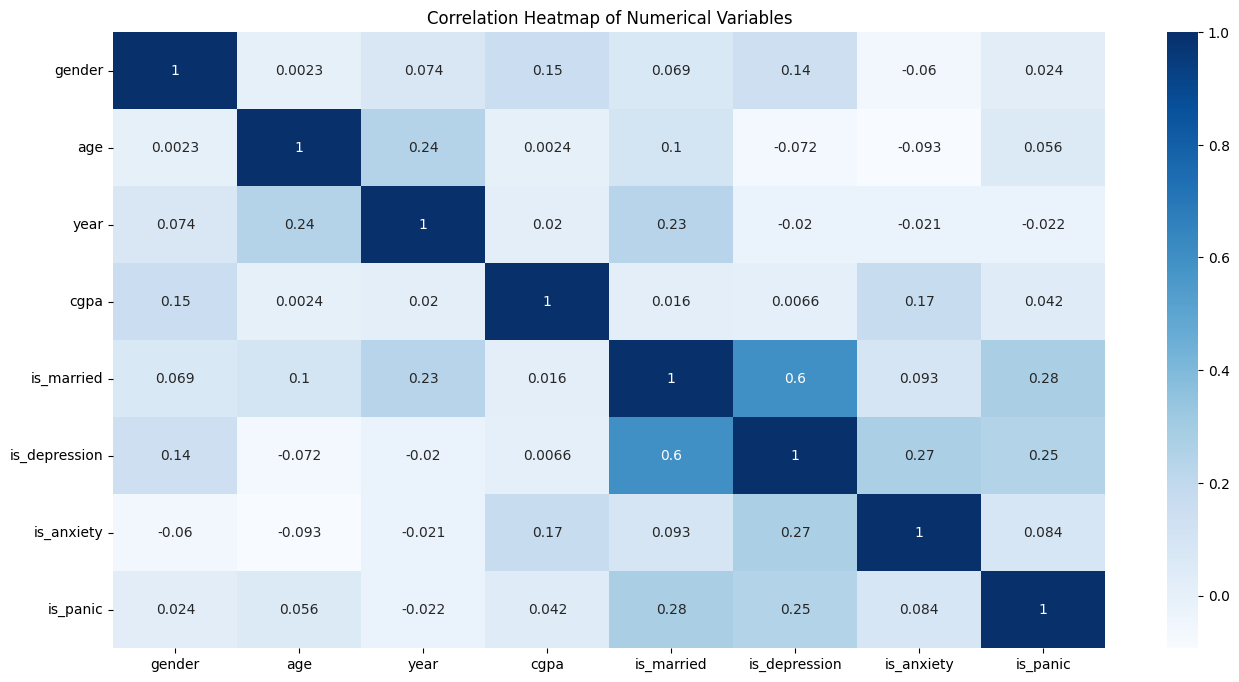

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
features = data.columns
target = 'is_depression'

In [ ]:
features

Index(['gender', 'age', 'year', 'cgpa', 'is_married', 'is_depression',
       'is_anxiety', 'is_panic'],
      dtype='object')

In [ ]:
X = np.array(data[features].drop(columns=['is_depression']))
y = np.array(data[target]).T

In [ ]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def build_model(X, y):
    model = LogisticRegression()
    model.fit(X, y)

    return model

In [ ]:
log_model = build_model(trainX, trainY)
display(log_model)

# Get score
log_model.score(testX, testY)

LogisticRegression()

0.7619047619047619

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred = log_model.predict(testX)
print("Precision: ", precision_score(testY , y_pred))
print("Recall: ", recall_score(testY , y_pred))
print("F1: ", f1_score(testY , y_pred))
print("Confusion matrix: \n", confusion_matrix(testY , y_pred))
print("Classification report: \n", classification_report(testY , y_pred))

Precision:  1.0
Recall:  0.375
F1:  0.5454545454545454
Confusion matrix: 
 [[13  0]
 [ 5  3]]
Classification report: 
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        13
           1       1.00      0.38      0.55         8

    accuracy                           0.76        21
   macro avg       0.86      0.69      0.69        21
weighted avg       0.83      0.76      0.73        21



In [ ]:
from joblib import dump
dump(log_model, 'logistic_model.joblib')

['logistic_model.joblib']

In [ ]:
from joblib import load

In [ ]:
model = load('./logistic_model.joblib')

In [ ]:
model.predict(pd.DataFrame([1,2,3,4,5,6,7]).T)[0]

1